In [24]:
import os
import sys
sys.path.append('../')
from src.utils import get_path_to, show_image, get_index_of_image_from_name, imread
from src.detector import StampDetector

In [25]:
stamp_detector = StampDetector()

In [26]:
# read all the images in the directory
dataset_path = get_path_to('input', 'datasets', 'igorkarayman', 'signatures-and-stamps', 'versions', '1', '1')
images = [f for f in os.listdir(dataset_path)]

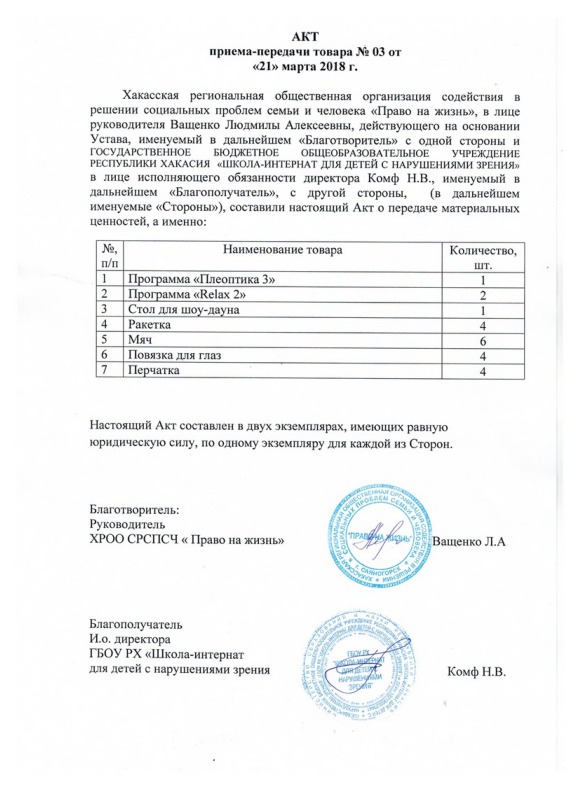

In [27]:
image = imread(os.path.join(
    dataset_path,
    images[
        get_index_of_image_from_name(
            'абакан-акт-1.jpg',
            images
        )
    ]
))
show_image(image)

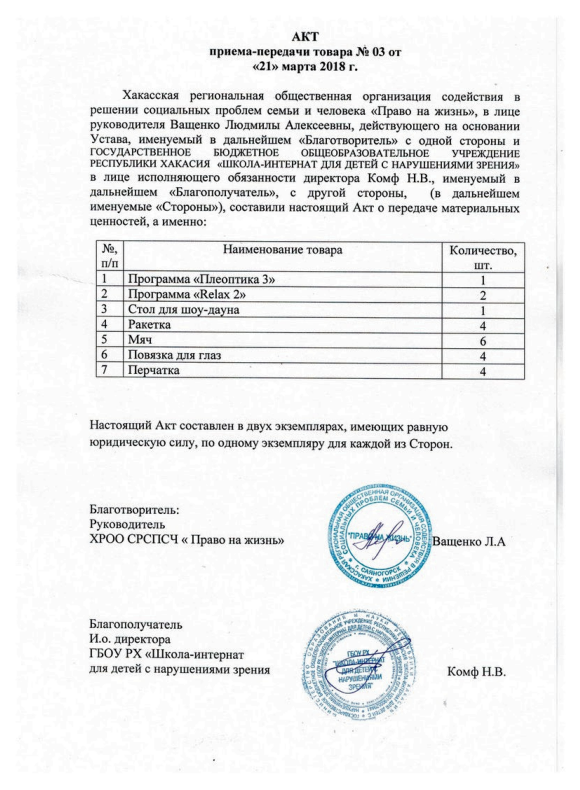

In [28]:
calibrated_image = stamp_detector.calibrate_colors(image)
show_image(calibrated_image)

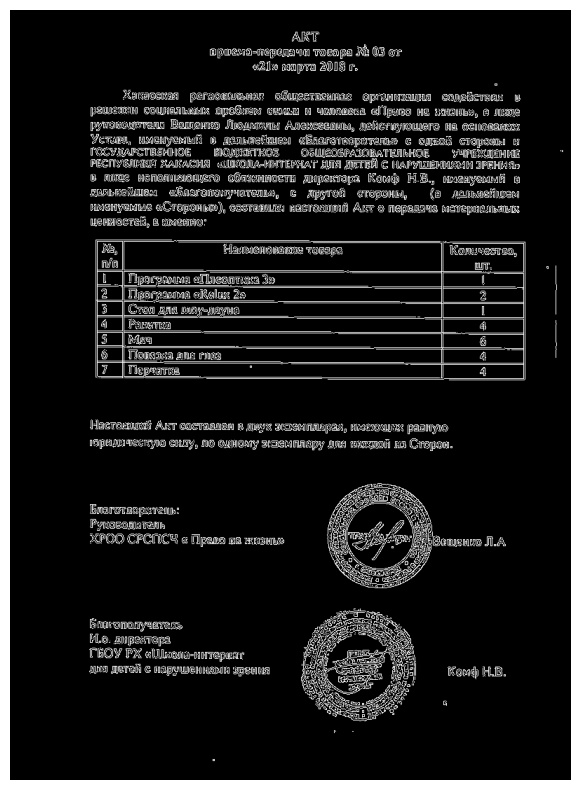

In [29]:
edge_image = stamp_detector.detect_edges(calibrated_image)
show_image(edge_image)

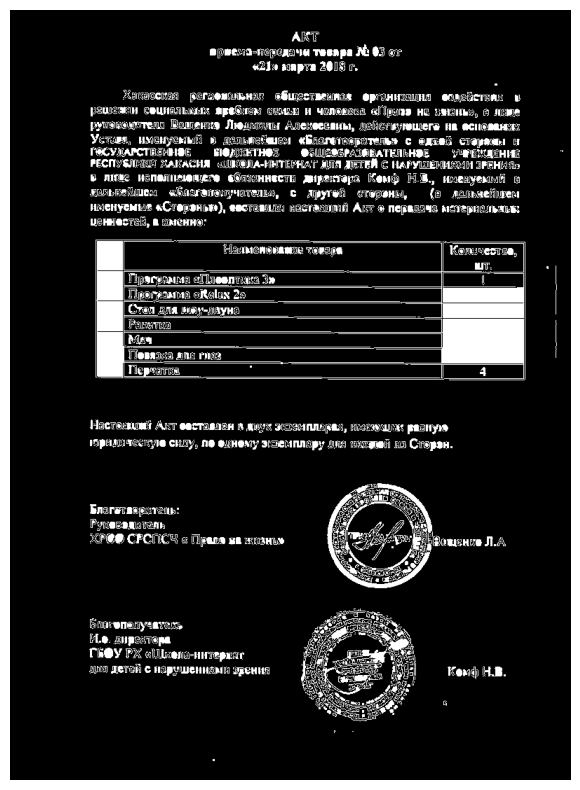

In [30]:
contours_image = stamp_detector.detect_contours(edge_image, calibrated_image.shape)
show_image(contours_image)

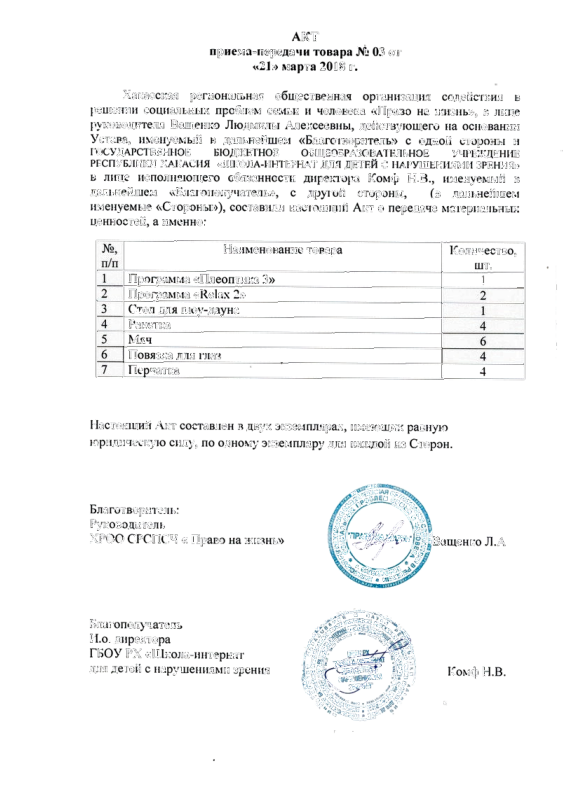

In [31]:
contours_masked_image = stamp_detector.apply_mask(calibrated_image, contours_image)
show_image(contours_masked_image)

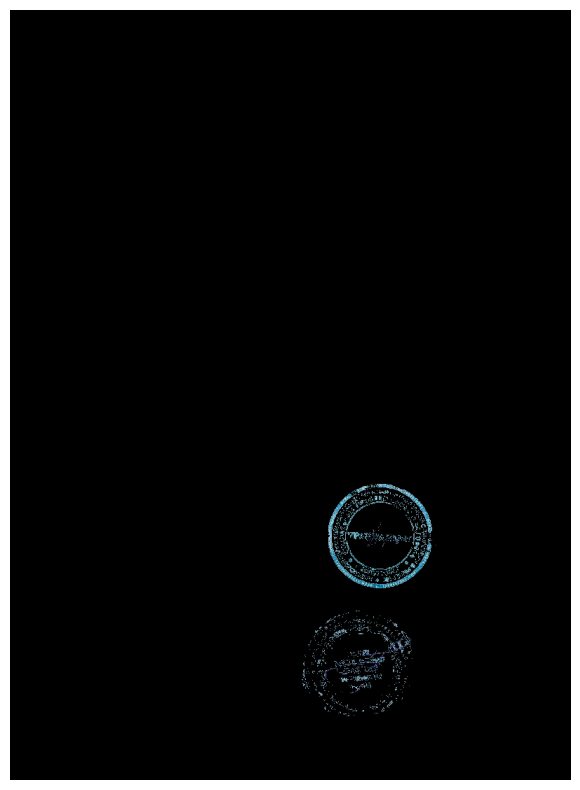

In [32]:
segmented_image = stamp_detector.segment(contours_masked_image)
show_image(segmented_image)

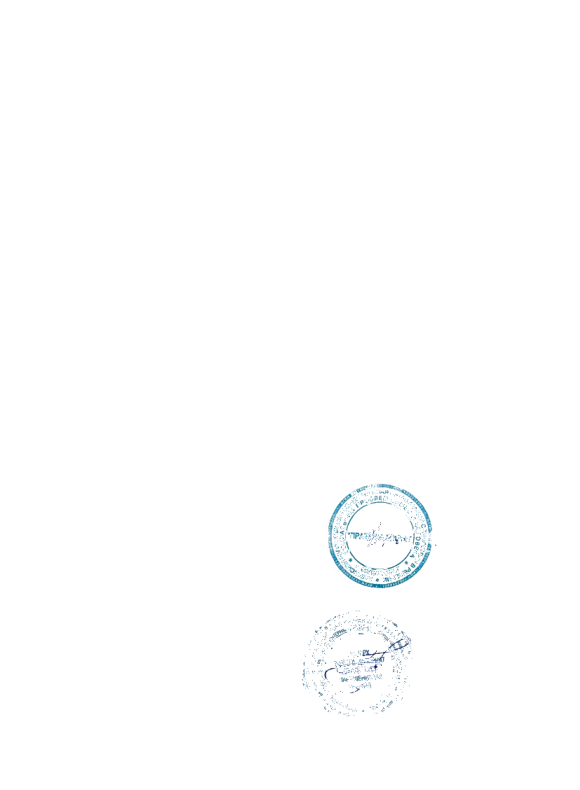

In [33]:
segmented_masked_image = stamp_detector.apply_mask(calibrated_image, segmented_image)
show_image(segmented_masked_image)

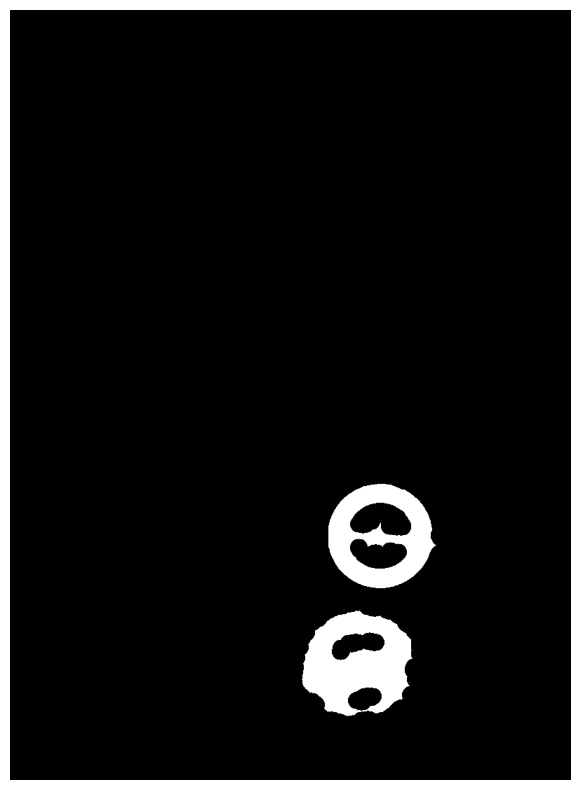

In [34]:
merged_image = stamp_detector.merge_connected_components(segmented_masked_image)
show_image(merged_image)

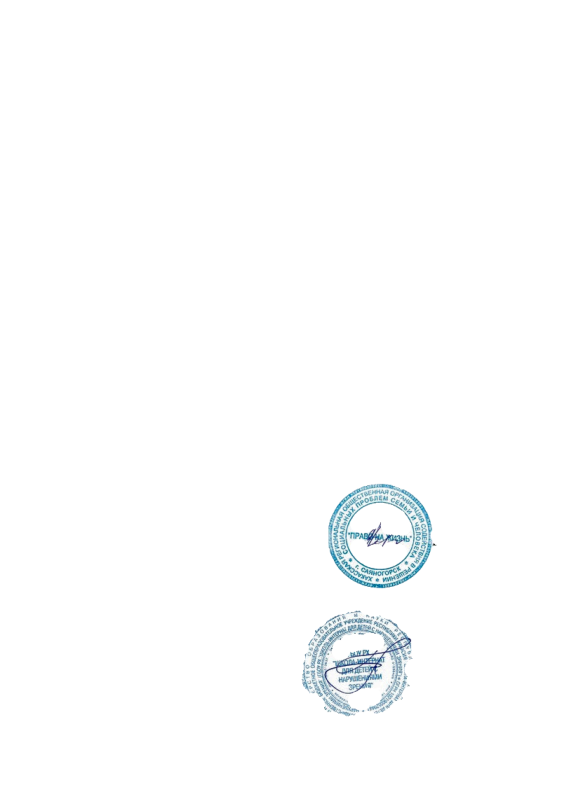

In [35]:
merged_masked_image = stamp_detector.apply_mask(calibrated_image, merged_image)
show_image(merged_masked_image)

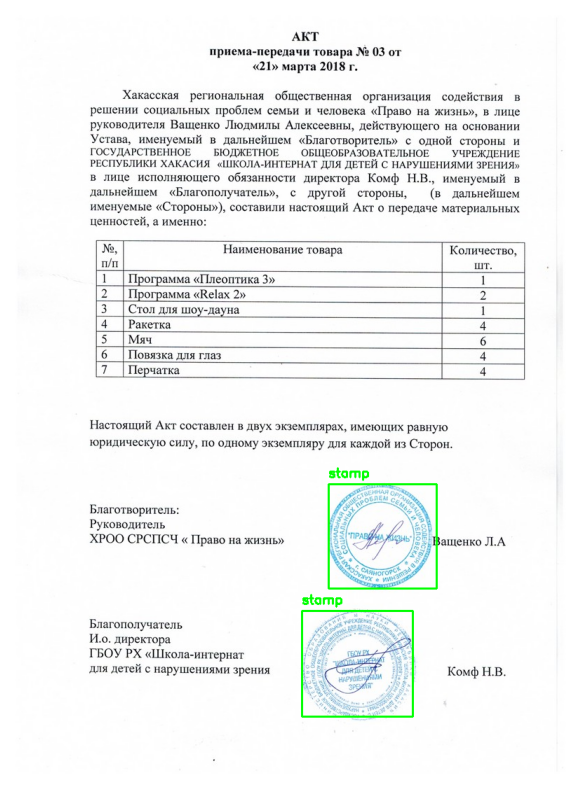

In [36]:
boxed_img = stamp_detector.draw_bounding_boxes(image, merged_masked_image, class_name="stamp")
show_image(boxed_img)